# Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.linalg import eigh
from numpy.linalg import multi_dot
import math

# Importing datasets

In [ ]:
XOR = pd.read_csv('Binary_XOR.txt', header=None)
Rects = pd.read_csv('Concentric_rectangles.txt', header=None)
Rings = pd.read_csv('Concentric_rings.txt', header=None)
Moons = pd.read_csv('Twomoons.txt', header=None)

# Functions

In [ ]:
def matrixMultiply(A,B):
  result = []
  # iterating by row of A
  for i in range(len(A)):
    # iterating by coloum by B
    row = [] 
    for j in range(len(B[0])):
      # iterating by rows of B
      num = 0
      for k in range(len(B)):
        num += A[i][k] * B[k][j]
      row.append(num)
    result.append(row)
  return result


In [ ]:
def transpose(M):
  return [ [ M[j][i] for j in range(len(M)) ] for i in range(len(M[0])) ]

In [ ]:
def giveL(dataset):
  data = dataset.values
  result= []
  for i in range(len(data)):
    row = []
    for j in range(len(data)):
      row.append(1) if data[i] == data[j] else row.append(0)
    result.append(row)
  return result

In [ ]:
def giveH(dataset):
  n = len(dataset)
  result = []
  for i in range(n):
    row = []
    for j in range(n):
      row.append(1-1/n) if i == j else row.append(-1/n)
    result.append(row)
  return result

In [ ]:
def giveQ(K,H,L):
  return multi_dot([K, H, L, H, K])

In [ ]:
def RBFkernel(xi,xj,sigma):
  landa = -1/(2*sigma**2)
  subtract = xi - xj
  return np.exp(landa*math.sqrt(np.matmul(subtract,subtract)) )

In [ ]:
def Ktrain(train,sigma):
  train = train.values
  return [ [ RBFkernel(train[i],train[j],sigma) for j in range(len(train)) ] for i in range(len(train)) ]

In [ ]:
def Ktest(train,test,sigma):
  train = train.values
  test = test.values
  return [ [ RBFkernel(train[i],test[j],sigma) for j in range(len(test)) ] for i in range(len(train)) ]

In [ ]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

# Binary_XOR

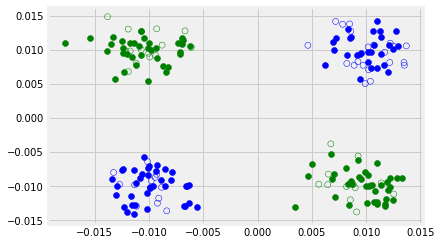

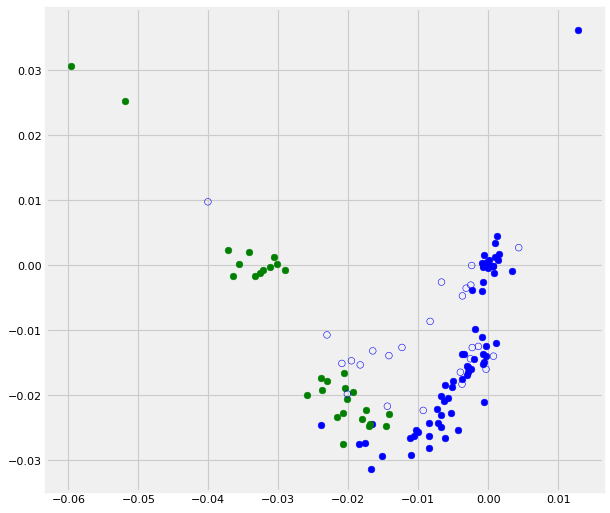

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XOR.iloc[:, :-1], XOR.iloc[:, -1], test_size = 0.3, random_state=9, shuffle=True)
train = pd.concat([X_train, y_train], axis =1)
test = pd.concat([X_test, y_test], axis =1)

sigma=0.1
H = giveH(X_train)
L = giveL(y_train)
K = Ktrain(X_train,sigma)
Kt = Ktest(X_train,X_test,sigma)
Q = giveQ(K,H,L)

w , v = eigh(Q,K)
beta = [ [v[i][0],v[i][1]] for i in range(len(v)) ]
Z = matrixMultiply(transpose(beta), K)
z = matrixMultiply(transpose(beta), Kt)

plt.scatter(train.where(train.iloc[:,-1] == 1).dropna()[0],train.where(train.iloc[:,-1] == 1).dropna()[1], c='blue')
plt.scatter(train.where(train.iloc[:,-1] == 2).dropna()[0],train.where(train.iloc[:,-1] == 2).dropna()[1], c='green')
plt.scatter(test.where(test.iloc[:,-1] == 1).dropna()[0],test.where(test.iloc[:,-1] == 1).dropna()[1], facecolors='none', edgecolors='blue')
plt.scatter(test.where(test.iloc[:,-1] == 2).dropna()[0],test.where(test.iloc[:,-1] == 2).dropna()[1], facecolors='none', edgecolors='green')

plt.show()
print("\n")
Z = transpose(Z)
z = transpose(z)
Z = pd.concat([pd.DataFrame(Z), y_train], axis =1)
z = pd.concat([pd.DataFrame(z), y_test], axis =1)
fig = plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(Z.where(Z.iloc[:,-1] == 1).dropna()[0],Z.where(Z.iloc[:,-1] == 1).dropna()[1], c='blue')
plt.scatter(Z.where(Z.iloc[:,-1] == 2).dropna()[0],Z.where(Z.iloc[:,-1] == 2).dropna()[1], c='green')
plt.scatter(z.where(z.iloc[:,-1] == 1).dropna()[0],z.where(z.iloc[:,-1] == 1).dropna()[1], facecolors='none', edgecolors='blue')
plt.scatter(z.where(z.iloc[:,-1] == 2).dropna()[0],z.where(z.iloc[:,-1] == 2).dropna()[1], facecolors='none', edgecolors='green')

plt.show()

# Rectangles

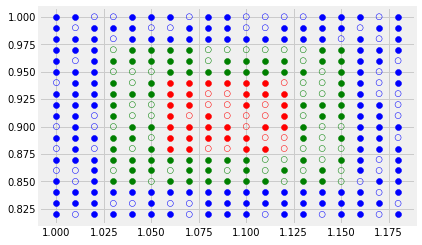

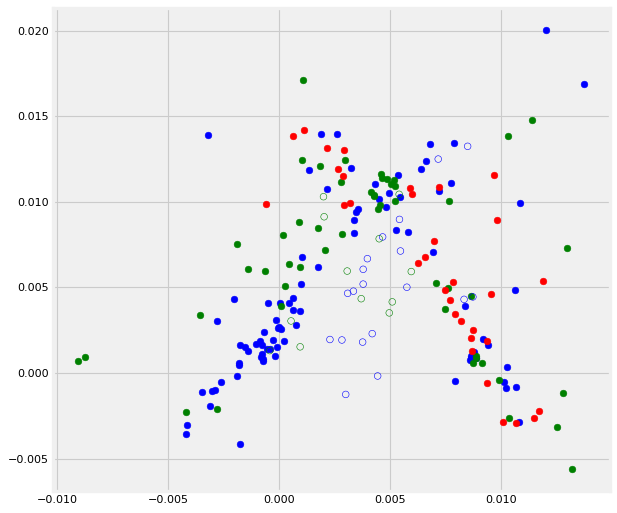

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Rects.iloc[:, :-1], Rects.iloc[:, -1], test_size = 0.3,random_state =2, shuffle=True)
train = pd.concat([X_train, y_train], axis =1)
test = pd.concat([X_test, y_test], axis =1)

sigma=0.8
H = giveH(X_train)
L = giveL(y_train)
K = Ktrain(X_train,sigma)
Kt = Ktest(X_train,X_test,sigma)
Q = giveQ(K,H,L)

w , v = eigh(Q,K)

beta = [ [v[i][0],v[i][1]] for i in range(len(v)) ]
Z = matrixMultiply(transpose(beta), K)
z = matrixMultiply(transpose(beta), Kt)

plt.scatter(train.where(train.iloc[:,-1] == 1).dropna()[0],train.where(train.iloc[:,-1] == 1).dropna()[1], c='blue')
plt.scatter(train.where(train.iloc[:,-1] == 2).dropna()[0],train.where(train.iloc[:,-1] == 2).dropna()[1], c='green')
plt.scatter(train.where(train.iloc[:,-1] == 3).dropna()[0],train.where(train.iloc[:,-1] == 3).dropna()[1], c='red')
plt.scatter(test.where(test.iloc[:,-1] == 1).dropna()[0],test.where(test.iloc[:,-1] == 1).dropna()[1], facecolors='none', edgecolors='blue')
plt.scatter(test.where(test.iloc[:,-1] == 2).dropna()[0],test.where(test.iloc[:,-1] == 2).dropna()[1], facecolors='none', edgecolors='green')
plt.scatter(test.where(test.iloc[:,-1] == 3).dropna()[0],test.where(test.iloc[:,-1] == 3).dropna()[1], facecolors='none', edgecolors='red')

plt.show()
print("\n")
Z = transpose(Z)
z = transpose(z)
Z = pd.concat([pd.DataFrame(Z), y_train], axis =1)
z = pd.concat([pd.DataFrame(z), y_test], axis =1)
fig = plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(Z.where(Z.iloc[:,-1] == 1).dropna()[0],Z.where(Z.iloc[:,-1] == 1).dropna()[1], c='blue')
plt.scatter(Z.where(Z.iloc[:,-1] == 2).dropna()[0],Z.where(Z.iloc[:,-1] == 2).dropna()[1], c='green')
plt.scatter(Z.where(Z.iloc[:,-1] == 3).dropna()[0],Z.where(Z.iloc[:,-1] == 3).dropna()[1], c='red')
plt.scatter(z.where(z.iloc[:,-1] == 1).dropna()[0],z.where(z.iloc[:,-1] == 1).dropna()[1], facecolors='none', edgecolors='blue')
plt.scatter(z.where(z.iloc[:,-1] == 2).dropna()[0],z.where(z.iloc[:,-1] == 2).dropna()[1], facecolors='none', edgecolors='green')
plt.scatter(z.where(z.iloc[:,-1] == 3).dropna()[0],z.where(z.iloc[:,-1] == 3).dropna()[1], facecolors='none', edgecolors='red')

plt.show()

# Rings

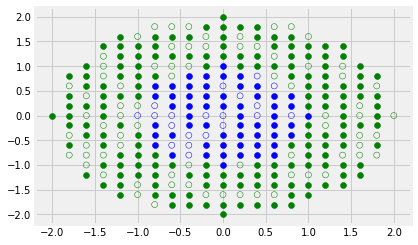

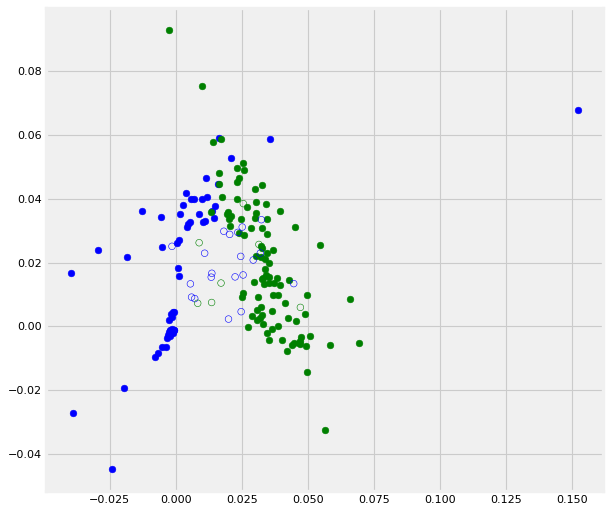

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Rings.iloc[:, :-1], Rings.iloc[:, -1], test_size = 0.3, random_state=1, shuffle=True)
train = pd.concat([X_train, y_train], axis =1)
test = pd.concat([X_test, y_test], axis =1)

sigma=0.8
H = giveH(X_train)
L = giveL(y_train)
K = Ktrain(X_train,sigma)
Kt = Ktest(X_train,X_test,sigma)
Q = giveQ(K,H,L)

w , v = eigh(Q,K)

beta = [ [v[i][0],v[i][1]] for i in range(len(v)) ]
Z = matrixMultiply(transpose(beta), K)
z = matrixMultiply(transpose(beta), Kt)
plt.scatter(train.where(train.iloc[:,-1] == 1).dropna()[0],train.where(train.iloc[:,-1] == 1).dropna()[1], c='blue')
plt.scatter(train.where(train.iloc[:,-1] == 2).dropna()[0],train.where(train.iloc[:,-1] == 2).dropna()[1], c='green')
plt.scatter(test.where(test.iloc[:,-1] == 1).dropna()[0],test.where(test.iloc[:,-1] == 1).dropna()[1], facecolors='none', edgecolors='blue')
plt.scatter(test.where(test.iloc[:,-1] == 2).dropna()[0],test.where(test.iloc[:,-1] == 2).dropna()[1], facecolors='none', edgecolors='green')

plt.show()
print("\n")
Z = transpose(Z)
z = transpose(z)
Z = pd.concat([pd.DataFrame(Z), y_train], axis =1)
z = pd.concat([pd.DataFrame(z), y_test], axis =1)
fig = plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(Z.where(Z.iloc[:,-1] == 1).dropna()[0],Z.where(Z.iloc[:,-1] == 1).dropna()[1], c='blue')
plt.scatter(Z.where(Z.iloc[:,-1] == 2).dropna()[0],Z.where(Z.iloc[:,-1] == 2).dropna()[1], c='green')
plt.scatter(z.where(z.iloc[:,-1] == 1).dropna()[0],z.where(z.iloc[:,-1] == 1).dropna()[1], facecolors='none', edgecolors='blue')
plt.scatter(z.where(z.iloc[:,-1] == 2).dropna()[0],z.where(z.iloc[:,-1] == 2).dropna()[1], facecolors='none', edgecolors='green')

plt.show()

# TwoMoons

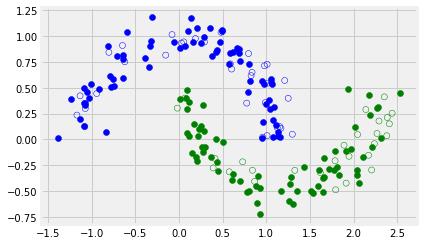

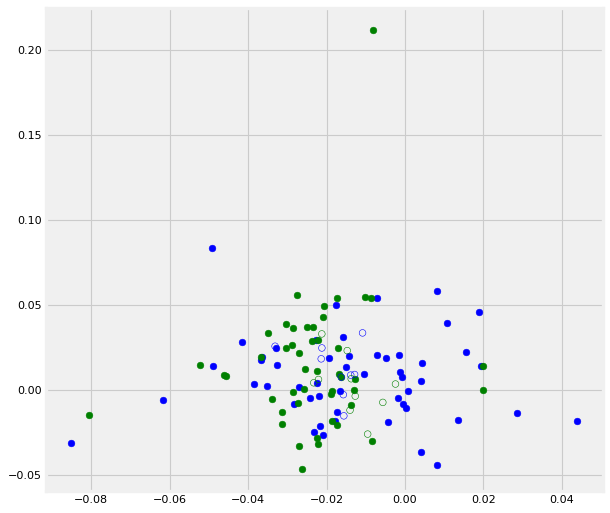

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Moons.iloc[:, :-1], Moons.iloc[:, -1], test_size = 0.3, random_state=3, shuffle=True)
train = pd.concat([X_train, y_train], axis =1)
test = pd.concat([X_test, y_test], axis =1)

sigma=0.4
H = giveH(X_train)
L = giveL(y_train)
K = Ktrain(X_train,sigma)
Kt = Ktest(X_train,X_test,sigma)
Q = giveQ(K,H,L)

w , v = eigh(Q,K)

beta = [ [v[i][0],v[i][1]] for i in range(len(v)) ]
Z = matrixMultiply(transpose(beta), K)
z = matrixMultiply(transpose(beta), Kt)

plt.scatter(train.where(train.iloc[:,-1] == 1).dropna()[0],train.where(train.iloc[:,-1] == 1).dropna()[1], c='blue')
plt.scatter(train.where(train.iloc[:,-1] == -1).dropna()[0],train.where(train.iloc[:,-1] == -1).dropna()[1], c='green')
plt.scatter(test.where(test.iloc[:,-1] == 1).dropna()[0],test.where(test.iloc[:,-1] == 1).dropna()[1], facecolors='none', edgecolors='blue')
plt.scatter(test.where(test.iloc[:,-1] == -1).dropna()[0],test.where(test.iloc[:,-1] == -1).dropna()[1], facecolors='none', edgecolors='green')

plt.show()
print("\n")
Z = transpose(Z)
z = transpose(z)
Z = pd.concat([pd.DataFrame(Z), y_train], axis =1)
z = pd.concat([pd.DataFrame(z), y_test], axis =1)
fig = plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(Z.where(Z.iloc[:,-1] == 1).dropna()[0],Z.where(Z.iloc[:,-1] == 1).dropna()[1], c='blue')
plt.scatter(Z.where(Z.iloc[:,-1] == -1).dropna()[0],Z.where(Z.iloc[:,-1] == -1).dropna()[1], c='green')
plt.scatter(z.where(z.iloc[:,-1] == 1).dropna()[0],z.where(z.iloc[:,-1] == 1).dropna()[1], facecolors='none', edgecolors='blue')
plt.scatter(z.where(z.iloc[:,-1] == -1).dropna()[0],z.where(z.iloc[:,-1] == -1).dropna()[1], facecolors='none', edgecolors='green')

plt.show()